In [38]:
import pandas as pd
import numpy as np  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
df = pd.read_csv("Mall Segmentation.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
print(df.corr(numeric_only=True))

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [41]:
df.replace('Male',0,inplace=True)
df.replace('Female',1,inplace=True)

C:\Users\Jash\AppData\Local\Temp\ipykernel_25620\1333810795.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Female',1,inplace=True)


In [42]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)
wcss   

[975512.0599999999,
 387065.71377137705,
 271765.8097426471,
 195401.19855991466,
 157620.9714797914,
 122628.06240556829,
 103208.9432178932,
 94242.61194086123,
 77010.15905811937,
 81388.67963757967]

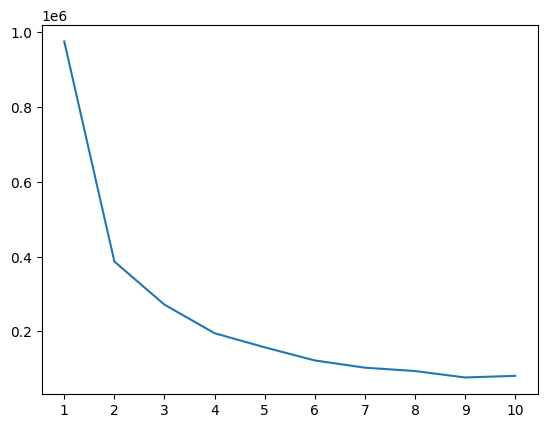

In [43]:
list = [1,2,3,4,5,6,7,8,9,10]
plt.plot(list,wcss)
plt.xticks(range(1,11))
plt.show()

In [44]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [45]:
df['Cluster']= model.predict(df)

In [46]:
df['Cluster'].unique()

array([2, 0, 1, 3])

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2


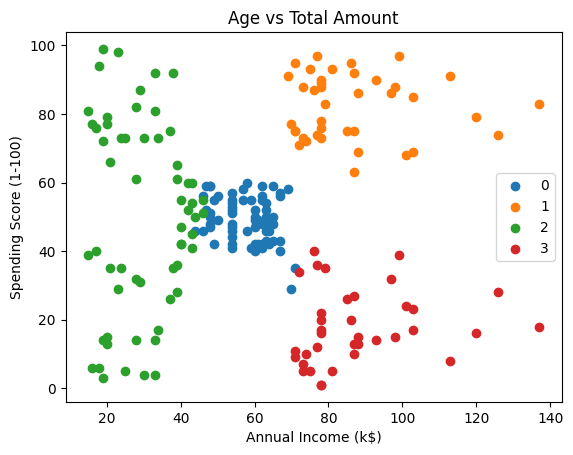

In [48]:
for i in sorted(df['Cluster'].unique()):
    filterData = df[df['Cluster'] == i]
    plt.scatter(x=filterData['Annual Income (k$)'], y=filterData['Spending Score (1-100)'], label = i)
plt.legend()
plt.title('Age vs Total Amount')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

C:\Users\Jash\AppData\Local\Temp\ipykernel_25620\980000576.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


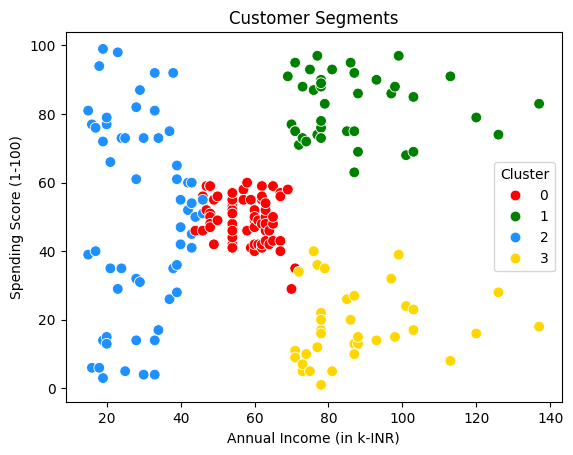

In [53]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette=colors,
    legend="full",
    data=df,
    s=60
)
 
plt.xlabel('Annual Income (in k-INR)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show() 

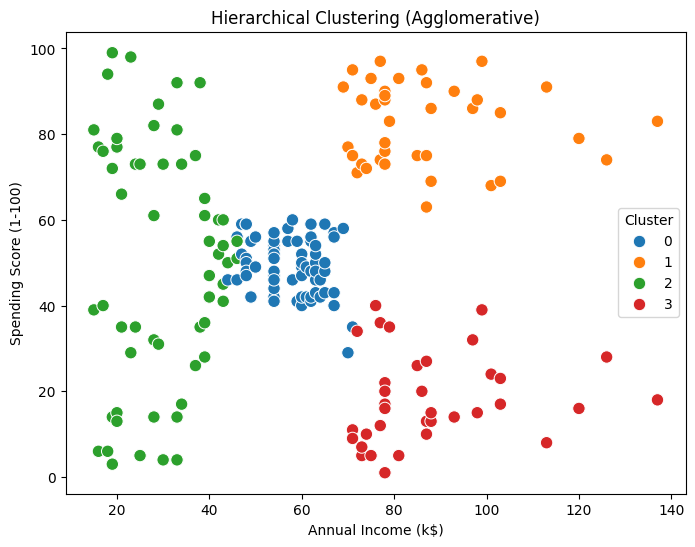

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="tab10",
    s=80
)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.show()